In [18]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv") 
data['timestamp'].apply(lambda row: str(row))
data.head()

,timestamp,epoch,train_acc,test_acc,train_loss,test_loss,n_params,train_time,prune_time,experiment
0,20200115T211755,1,0.869508,0.8830,0.378313,0.338034,3759674,11.287473,8.060188,fmnist_sv-zeros_0.0_30steps
1,20200115T211755,2,0.910712,0.9112,0.246927,0.242435,2594312,5.768898,2.615974,fmnist_sv-zeros_0.0_30steps
2,20200115T211755,3,0.928661,0.9089,0.193959,0.248388,2022939,5.546756,2.127191,fmnist_sv-zeros_0.0_30steps
3,20200115T211755,4,0.940847,0.9175,0.163652,0.237061,1674862,5.369878,1.812795,fmnist_sv-zeros_0.0_30steps
4,20200115T211755,5,0.950085,0.9135,0.137641,0.241407,1409629,5.482741,1.680006,fmnist_sv-zeros_0.0_30steps


### FMNIST CNN 1.8M parameters

Accuracy
                                     test_acc
experiment                                   
fmnist_sv-abs-smallest_0.15_30steps  0.922500
fmnist_sv-nonpositive_0.0_30steps    0.919533
fmnist_sv-zeros_0.0_30steps          0.925100
Training time
                                     train_time  prune_time
experiment                                                 
fmnist_sv-abs-smallest_0.15_30steps  208.715569  113.007134
fmnist_sv-nonpositive_0.0_30steps    240.860710   52.490453
fmnist_sv-zeros_0.0_30steps          239.793128   40.491919
Sparsity
                                     n_params
experiment                                   
fmnist_sv-abs-smallest_0.15_30steps  4.296216
fmnist_sv-nonpositive_0.0_30steps    0.253128
fmnist_sv-zeros_0.0_30steps          1.844061


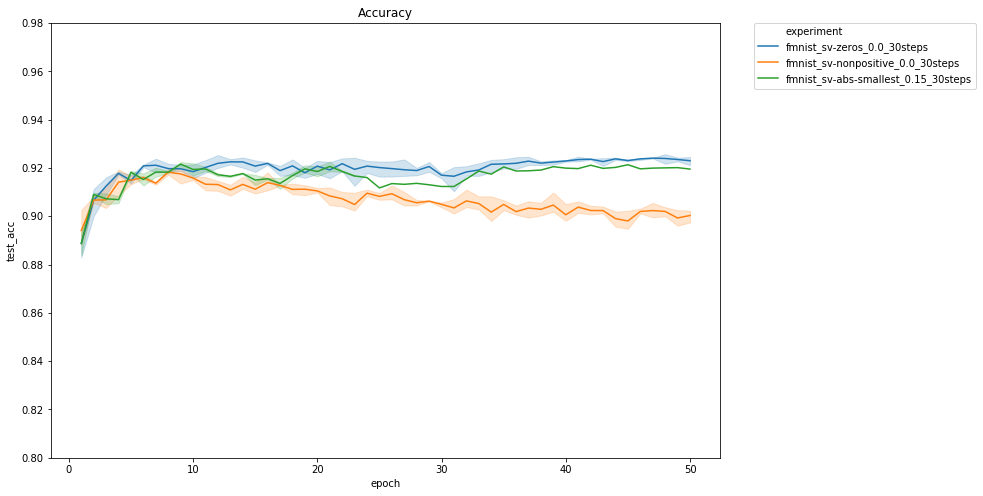

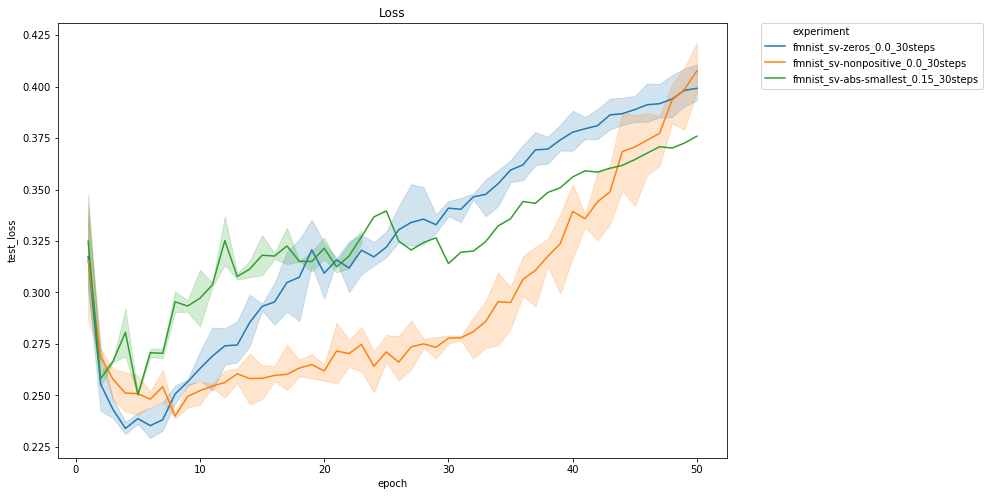

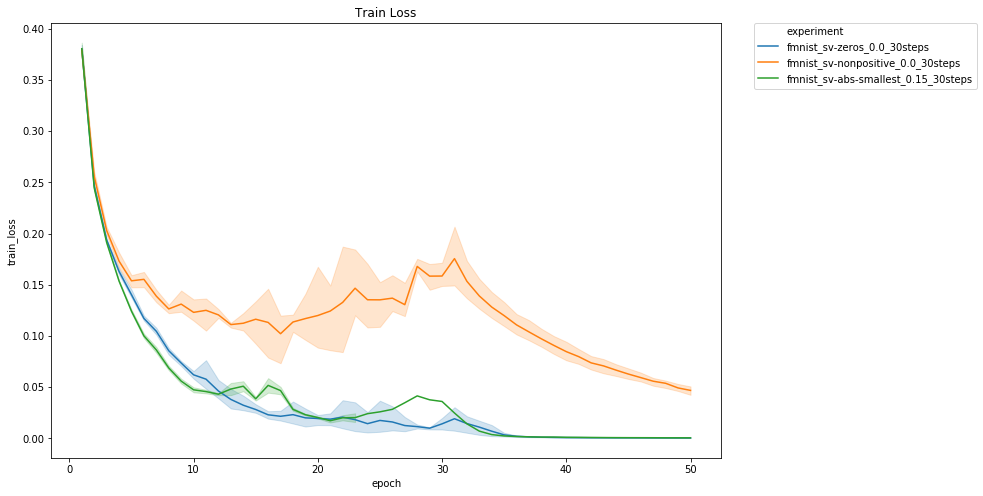

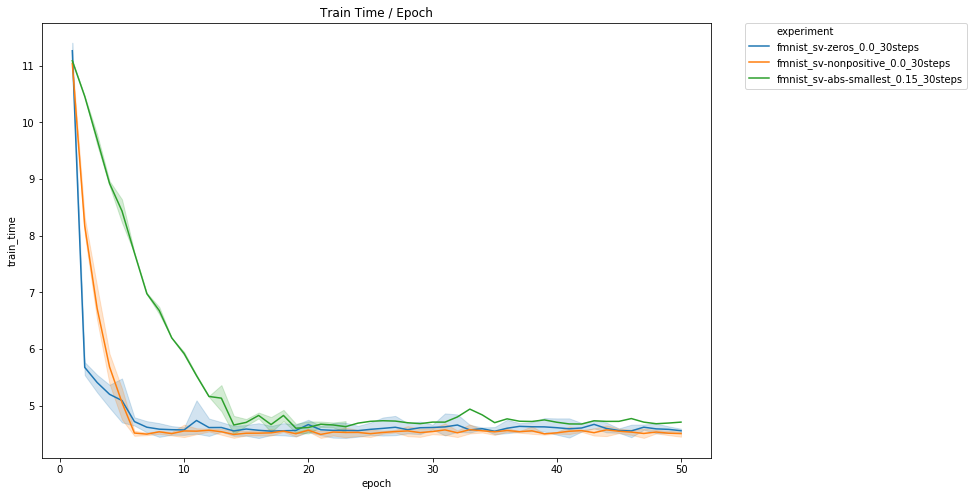

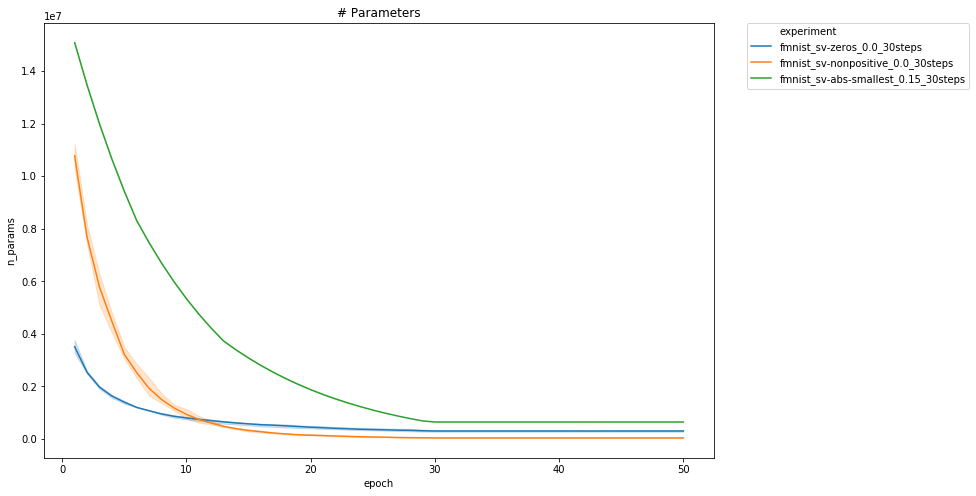

In [19]:
dataset = "fmnist"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["experiment"].str.contains("SET7")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("prunedyn_sv")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("0.15")]

# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
plt.title("Accuracy")
plt.ylim([0.8, 0.98])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
